In [30]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
from uavsar_pytools.convert.tiff_conversion import read_annotation
import rasterio as rio
from rasterio.plot import show
from uavsar_pytools.georeference import geolocate_uavsar

In [27]:
## Read files to be plotted
# Files from ISCE (Radar coordinates)

# read in the unwrapped phase (unw)
unw_path = '/Users/jacktarricone/jemez_isce/igrams/20200212T1545_20200226T1627/20200212T1545_20200226T1627.unw_snaphu.unw.vrt'
ds = gdal.Open(unw_path, gdal.GA_ReadOnly)
unw = ds.GetRasterBand(2).ReadAsArray() # grab second layer
ds = None

# read in connected componets
ds = gdal.Open("/Users/jacktarricone/jemez_isce/igrams/20200212T1545_20200226T1627/20200212T1545_20200226T1627.unw_snaphu.unw.conncomp", gdal.GA_ReadOnly)
conncomp = ds.GetRasterBand(1).ReadAsArray() # grab second layer
ds = None

# wrwapped interferogram
igram_path = '/Users/jacktarricone/jemez_isce/igrams/20200212T1545_20200226T1627/20200212T1545_20200226T1627.int'
ds = gdal.Open(igram_path, gdal.GA_ReadOnly)
igram = ds.GetRasterBand(1).ReadAsArray()
ds = None

cor_path = '/Users/jacktarricone/jemez_isce/igrams/20200212T1545_20200226T1627/20200212T1545_20200226T1627.coh.vrt'
ds = gdal.Open(cor_path, gdal.GA_ReadOnly)
cor = ds.GetRasterBand(1).ReadAsArray()
ds = None

#wamask = 'Igram/20150508T1134_20150508T1353/filt_20150508T1134_20150508T1353.wmask'
#ds = gdal.Open(wamask, gdal.GA_ReadOnly)
#wmask = ds.GetRasterBand(1).ReadAsArray()
#ds = None

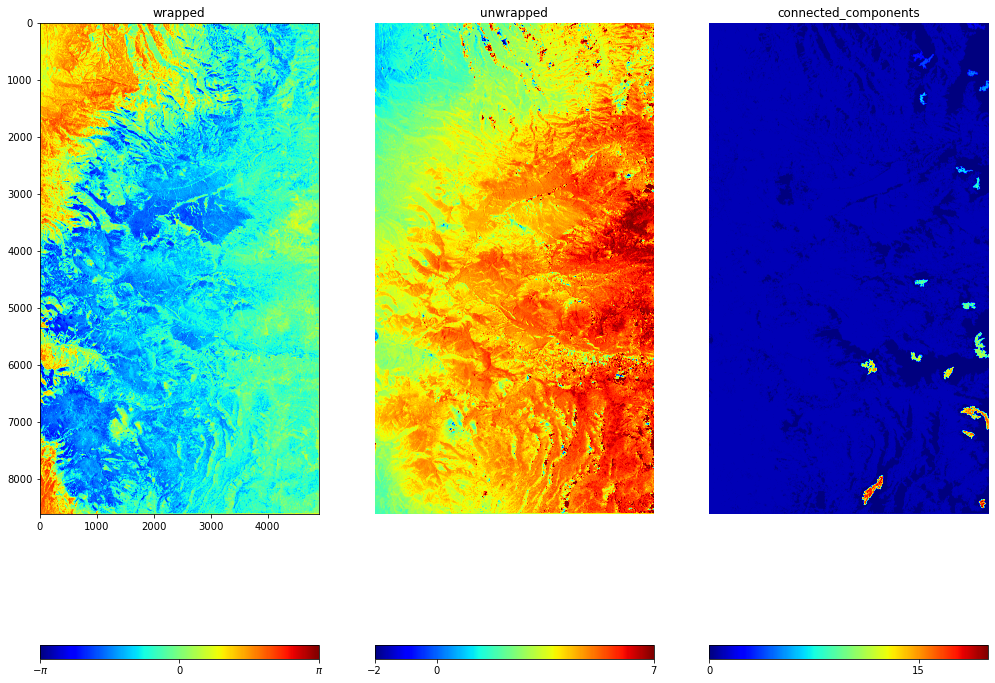

In [24]:
# plot unw, int, cor

fig = plt.figure(figsize=(17, 16))

ax = fig.add_subplot(1,3,1)
cax=ax.imshow(np.angle(igram), cmap='jet')
ax.set_title("wrapped")
#ax.set_axis_off()
cbar = fig.colorbar(cax, ticks=[-3.14,0,3.14],orientation='horizontal')
cbar.ax.set_xticklabels(["$-\pi$",0,"$\pi$"])

ax = fig.add_subplot(1,3,2)
cax = ax.imshow(unw, vmin = -2, vmax = 7, cmap = 'jet')
ax.set_title("unwrapped")
ax.set_axis_off()
cbar = fig.colorbar(cax, ticks=[-2,0, 7], orientation='horizontal')


ax = fig.add_subplot(1,3,3)
cax = ax.imshow(conncomp, cmap = 'jet')
ax.set_title("connected_components")
ax.set_axis_off()
cbar = fig.colorbar(cax, ticks=[0,15] , orientation='horizontal')


connected_components = None

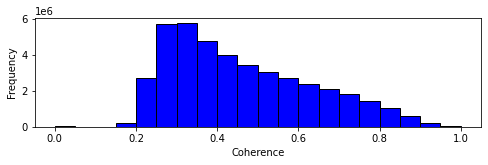

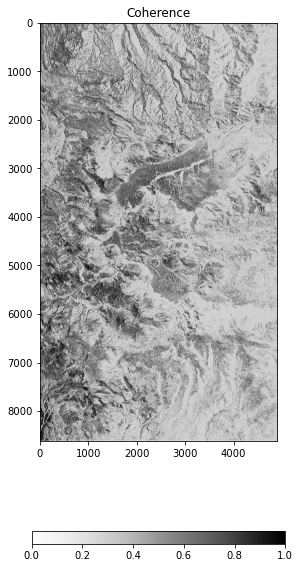

In [16]:
## Coherence plots

# plot historgram
fig = plt.figure(figsize=(8, 2))

ax = fig.add_subplot(1,1,1)
cax = ax.hist(cor.ravel(), bins=20, range=(0.0, 1.0), fc='b', ec='k')
plt.xlabel('Coherence'); plt.ylabel('Frequency')

fig = plt.figure(figsize=(10, 11))
ax = fig.add_subplot(1,2,1)
cax = ax.imshow(cor, vmin = 0 , vmax = 1.0, cmap = 'Greys')
ax.set_title("Coherence")
#ax.set_axis_off()
cbar = fig.colorbar(cax,orientation='horizontal')

In [25]:
#### unwrapped phase

# path to your unw.vrt
in_fp = unw_path # from above

# path to annotation file
ann_fp = '/Users/jacktarricone/jemez_isce/download/alamos_35915_20005_003_200212_L090HH_01_BU.ann'

# where the .tif is being save
out_dir = '/Users/jacktarricone/ch1_jemez_data/gpr_rasters_ryan'

# path to lat/lon/height file
llh_fp = '/Users/jacktarricone/jemez_isce/download/alamos_35915_01_BU_s1_2x8.llh'

In [26]:
# run geolocate function
geolocated_data = geolocate_uavsar(in_fp = in_fp, ann_fp = ann_fp, out_dir = out_dir, llh_fp = llh_fp)
print(geolocated_data[0])

Ignore the error message: Unable to compute bounds. It is related
                to the pixels created by the conversion along the edge of topography.
                Error message is known and should not be an issue.
/Users/jacktarricone/ch1_jemez_data/gpr_rasters_ryan/20200212T1545_20200226T1627.unw_snaphu.unw.tif.unw.tif


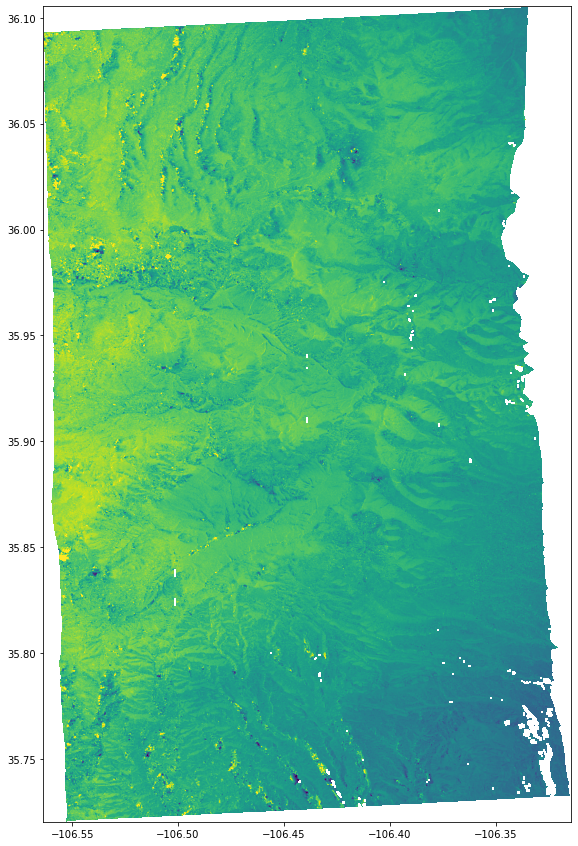

In [32]:
with rio.open(geolocated_data[0]) as src:
    plt.subplots(1, figsize=(15, 15))
    show(src, vmin = -3, vmax = 8) # read second band of unw files

In [34]:
#### coherence
# path to your unw.vrt
in_fp = cor_path # from above

# path to annotation file
ann_fp = '/Users/jacktarricone/jemez_isce/download/alamos_35915_20005_003_200212_L090HH_01_BU.ann'

# where the .tif is being save
out_dir = '/Users/jacktarricone/ch1_jemez_data/gpr_rasters_ryan'

# path to lat/lon/height file
llh_fp = '/Users/jacktarricone/jemez_isce/download/alamos_35915_01_BU_s1_2x8.llh'

In [35]:
# run geolocate function
geolocated_data = geolocate_uavsar(in_fp = in_fp, ann_fp = ann_fp, out_dir = out_dir, llh_fp = llh_fp)
print(geolocated_data[0])

/Users/jacktarricone/ch1_jemez_data/gpr_rasters_ryan/20200212T1545_20200226T1627.coh.tif.coh.tif


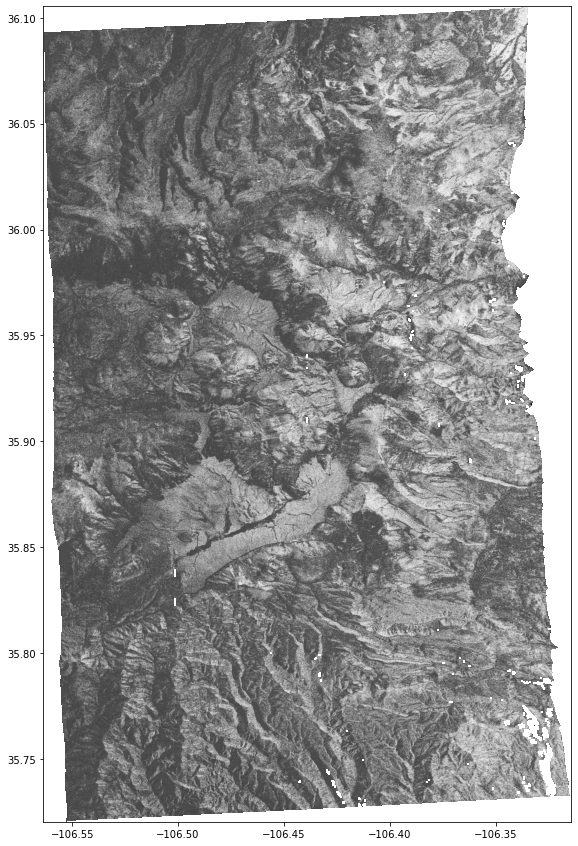

In [38]:
with rio.open(geolocated_data[0]) as src:
    plt.subplots(1, figsize=(15, 15))
    show(src, vmin = 0, vmax = 1, cmap = 'gist_gray') # read second band of unw files